In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Data_midterm.csv')
df['class'] = df['price'] >= 2000000
df['class'] = df['class'].astype(int)
df.head(5)

,bedroom,bathroom,parking,area,price,location,class
0,0,0,1,33,2100000,muang,1
1,1,1,1,30,1650000,chang phueak,0
2,1,1,2,30,1490000,suthep,0
3,1,1,2,37,1690000,nimman,0
4,1,1,1,30,1449000,faham,0


### *Change from boolean to numeric type for 'class'*

In [144]:
# 1 is greater than 2M
# 0 is lower than 2M

df['class'].value_counts()

class
1    170
0    115
Name: count, dtype: int64

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   bedroom   285 non-null    int64 
 1   bathroom  285 non-null    int64 
 2   parking   285 non-null    int64 
 3    area     285 non-null    int64 
 4   price     285 non-null    int64 
 5   location  285 non-null    object
 6   class     285 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 15.7+ KB


Drop location out from data frame

In [146]:
# dft as new data frame without 'location'
dft = df.drop('location', axis=1)
dft

,bedroom,bathroom,parking,area,price,class
0,0,0,1,33,2100000,1
1,1,1,1,30,1650000,0
2,1,1,2,30,1490000,0
3,1,1,2,37,1690000,0
4,1,1,1,30,1449000,0
...,...,...,...,...,...,...
280,1,1,2,46,2550000,1
281,1,1,2,43,3500000,1
282,1,1,2,44,3650000,1
283,0,0,2,33,2500000,1


Check for Null value

In [147]:
nan_cols = [i for i in dft.columns if df[i].isnull().any()]
# dft[nan_cols].isnull().sum()
dft.isnull().sum()

bedroom     0
bathroom    0
parking     0
 area       0
price       0
class       0
dtype: int64

### *Check for outlier*

In [148]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(dft)

In [149]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

threshold = -1.5
filter = outlier_score["score"] < threshold
outlier_index = outlier_score[filter].index.tolist()

In [150]:
len(outlier_index)

22

In [151]:
dft.drop(outlier_index, inplace=True)
dft

,bedroom,bathroom,parking,area,price,class
0,0,0,1,33,2100000,1
1,1,1,1,30,1650000,0
2,1,1,2,30,1490000,0
3,1,1,2,37,1690000,0
4,1,1,1,30,1449000,0
...,...,...,...,...,...,...
279,1,1,2,32,1500000,0
280,1,1,2,46,2550000,1
281,1,1,2,43,3500000,1
282,1,1,2,44,3650000,1


### *Plot Heatmap*

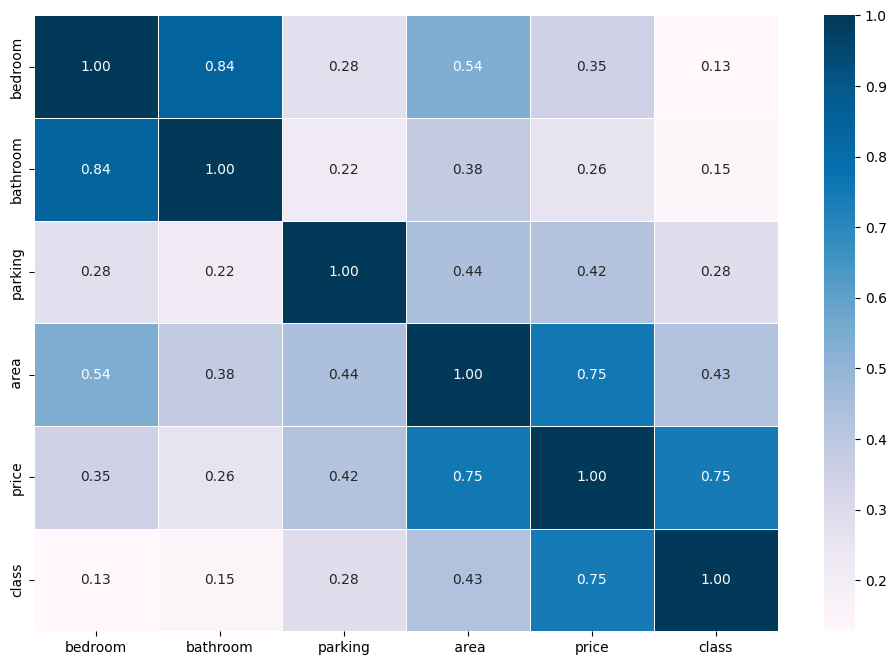

In [152]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(dft.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt='.2f', ax=ax)
plt.show()

### *Seperate x and y*

In [153]:
x = dft.drop(['class'], axis=1)
x

,bedroom,bathroom,parking,area,price
0,0,0,1,33,2100000
1,1,1,1,30,1650000
2,1,1,2,30,1490000
3,1,1,2,37,1690000
4,1,1,1,30,1449000
...,...,...,...,...,...
279,1,1,2,32,1500000
280,1,1,2,46,2550000
281,1,1,2,43,3500000
282,1,1,2,44,3650000


In [154]:
y = dft['class']
y

0      1
1      0
2      0
3      0
4      0
      ..
279    0
280    1
281    1
282    1
283    1
Name: class, Length: 263, dtype: int64

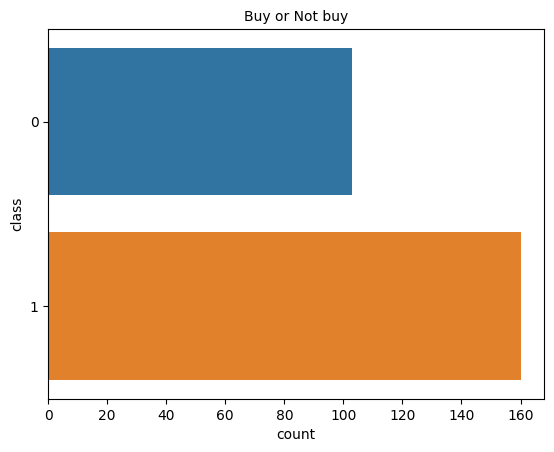

In [155]:
sns.countplot(data = dft, y = 'class')
plt.title("Buy or Not buy", fontsize=10)
plt.show()

# Note:
# 0 : less than 2M => Not
# 1 : equal or greater than 2M => Buy

Imbalance dataset

In [156]:
dft['class'].value_counts()

class
1    160
0    103
Name: count, dtype: int64

Fit transform x

In [157]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.93120941, -2.23171119, -1.88911552, -0.31499928, -0.14059338],
       [ 0.05280651,  0.27657959, -1.88911552, -0.7735499 , -0.5869964 ],
       [ 0.05280651,  0.27657959,  0.25242492, -0.7735499 , -0.74571747],
       [ 0.05280651,  0.27657959,  0.25242492,  0.29640154, -0.54731613],
       [ 0.05280651,  0.27657959, -1.88911552, -0.7735499 , -0.78638975]])

### *Train-Test Split*

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify=y)

### *KNN*

In [159]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

steps = [
    ('scaler', StandardScaler()),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

knn_pipe = Pipeline(steps)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])

In [160]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

print()
print("Testing")
print()

ypred_test = knn_pipe.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)


Testing

[[34  0]
 [ 5 48]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        34
           1       1.00      0.91      0.95        53

    accuracy                           0.94        87
   macro avg       0.94      0.95      0.94        87
weighted avg       0.95      0.94      0.94        87

